# (연구&교수님) 다중척도논문 – DWT

최규빈  
2024-07-10

예제 설명

-   신호 생성: 주파수가 시간에 따라 변하는 신호를 생성합니다. 예를 들어,
    주파수가 선형적으로 증가하는 신호와 주기적인 진동을 포함하는 신호를
    생성합니다.
-   STFT 수행: STFT를 사용하여 신호를 분석하고 시간-주파수
    스펙트로그램을 생성합니다.
-   웨이블릿 변환 수행: 웨이블릿 변환을 사용하여 신호를 분석하고
    시간-주파수 스펙트로그램을 생성합니다.
-   결과 비교: 두 방법의 결과를 시각적으로 비교합니다.

In [5]:
import seaborn as sns
sns.set()

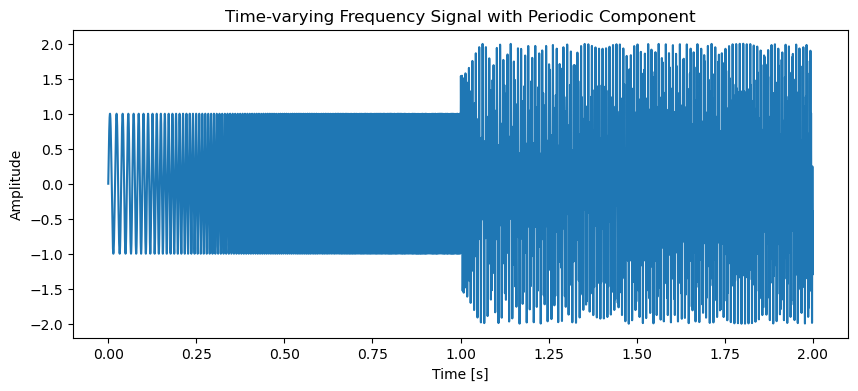

In [47]:
import numpy as np
import matplotlib.pyplot as plt
# 샘플링 주파수 및 시간 축 설정
fs = 10000
t = np.linspace(0, 2, 2 * fs, endpoint=False)

# 주파수가 선형적으로 증가하는 신호 생성
f0 = 50   # 시작 주파수
f1 = 300  # 종료 주파수
linear_chirp = np.sin(2 * np.pi * (f0 + (f1 - f0) * t / 2) * t)

# 주기적인 진동 신호 생성
periodic_signal = np.sin(2 * np.pi * 100 * t) * (t > 1)

# 신호 합성
signal = linear_chirp + periodic_signal

plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title("Time-varying Frequency Signal with Periodic Component")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [48]:
len(t)

20000

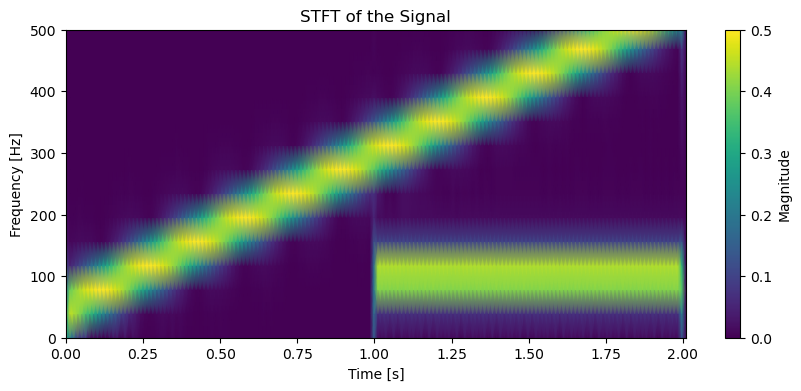

In [49]:
from scipy.signal import stft

# STFT 수행
f, t, Zxx = stft(signal, fs, nperseg=256)

plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT of the Signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label='Magnitude')
plt.ylim(0, 500)
plt.show()

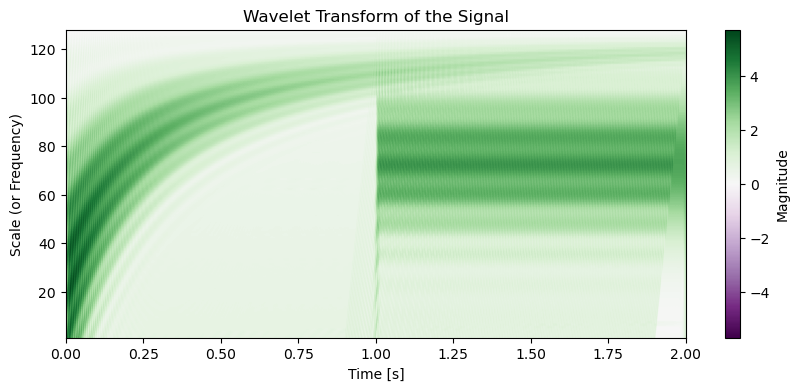

In [51]:
import pywt
import scipy.signal

# 웨이블릿 변환 수행
widths = np.arange(1, 128)
cwtmatr, freqs = pywt.cwt(signal, widths, 'cmor', sampling_period=1/fs)

plt.figure(figsize=(10, 4))
plt.imshow(np.abs(cwtmatr), extent=[0, 2, 1, 128], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title("Wavelet Transform of the Signal")
plt.xlabel("Time [s]")
plt.ylabel("Scale (or Frequency)")
plt.colorbar(label='Magnitude')
plt.show()

결과 비교

위의 플롯을 비교하면 다음과 같은 차이를 볼 수 있습니다:

-   STFT: 주파수 해상도가 일정하지만, 시간 해상도는 고정된 창 길이에
    의존합니다. 시간-주파수 스펙트로그램에서 선형적인 변화와 주기적인
    신호를 모두 잘 보여줍니다.
-   웨이블릿 변환: 주파수 해상도와 시간 해상도가 스케일에 따라
    달라집니다. 낮은 주파수에서는 더 높은 주파수 해상도, 높은
    주파수에서는 더 높은 시간 해상도를 제공합니다. 웨이블릿 변환은
    신호의 국소적인 특성을 더 잘 포착할 수 있습니다.

위 예시는 일반적인 신호 처리 방법을 설명하기 위해 작성된 것이며, 특정
출처가 있는 것이 아니라 신호 처리 이론에 기반한 예제입니다. STFT와
웨이블릿 변환은 신호 처리 분야에서 널리 사용되는 기법으로, 이러한 예제는
많은 신호 처리 교재나 튜토리얼에서 다루고 있습니다. 특히, 다음과 같은
교재나 자료에서 유사한 내용을 찾을 수 있습니다:

1.  **교재**
    -   “Time-Frequency Analysis” by Leon Cohen
    -   “Wavelet Transform and Time-Frequency Signal Analysis” by
        Lokenath Debnath
    -   “Discrete-Time Signal Processing” by Alan V. Oppenheim and
        Ronald W. Schafer
2.  **온라인 자료**
    -   MATLAB 및 Python 관련 신호 처리 튜토리얼
    -   SciPy 공식 문서와 관련 신호 처리 예제
    -   PyWavelets 라이브러리 문서 및 튜토리얼

이러한 교재와 온라인 자료에서는 STFT와 웨이블릿 변환의 기본 개념, 수학적
배경, 그리고 구현 예제 등을 다루고 있으며, 이를 바탕으로 위와 같은
예제를 구성할 수 있습니다.

위 코드는 기본적인 신호 생성, STFT 및 웨이블릿 변환을 시각화하기 위해
Python의 NumPy, SciPy, Matplotlib, 그리고 PyWavelets 라이브러리를
사용하여 작성되었습니다. 특정 출처에 기반하지 않은, 신호 처리 기법을
설명하기 위한 예시 코드입니다.

/tmp/ipykernel_5940/685532019.py:19: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matr = cwt(signal, morlet, widths)

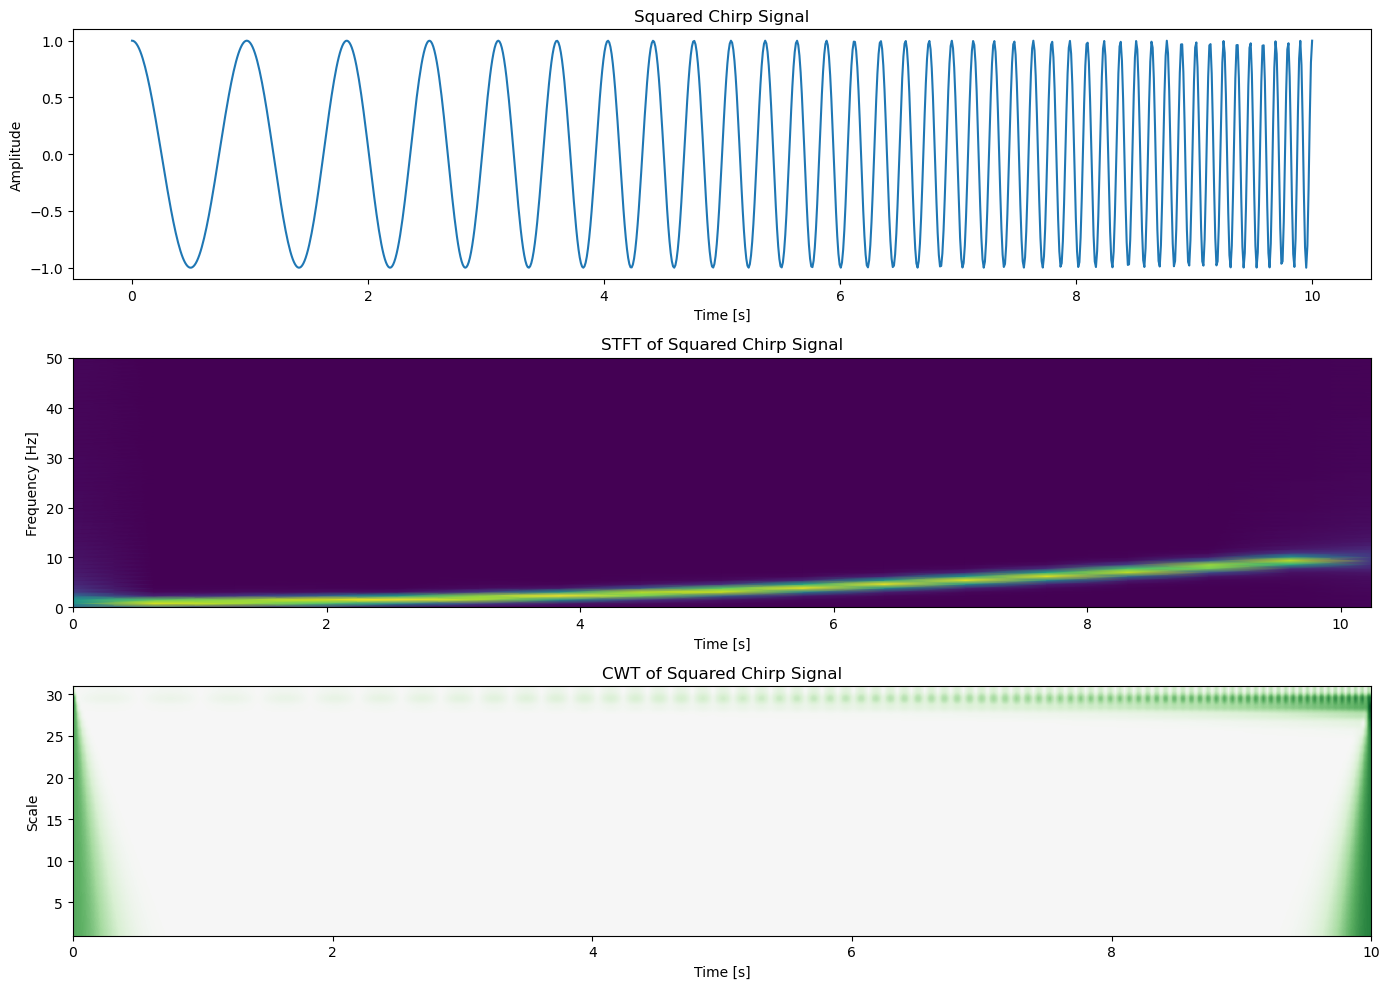

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, stft, cwt, morlet

# Squared chirp 신호 생성
t = np.linspace(0, 10, 1000)
f0 = 1  # 초기 주파수
t1 = 10  # 신호의 종료 시간
f1 = 10  # 종료 주파수

# squared chirp: 주파수가 시간의 제곱에 비례하도록 설정
signal = chirp(t, f0=f0, t1=t1, f1=f1, method='quadratic')

# STFT 수행
f, t_stft, Zxx = stft(signal, fs=100, nperseg=128)

# CWT 수행
widths = np.arange(1, 31)
cwt_matr = cwt(signal, morlet, widths)

# 결과 플롯
plt.figure(figsize=(14, 10))

# 원본 신호 플롯
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title("Squared Chirp Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# STFT 결과 플롯
plt.subplot(3, 1, 2)
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT of Squared Chirp Signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")

# CWT 결과 플롯
plt.subplot(3, 1, 3)
plt.imshow(np.abs(cwt_matr), extent=[0, 10, 1, 31], cmap='PRGn', aspect='auto', vmax=abs(cwt_matr).max(), vmin=-abs(cwt_matr).max())
plt.title("CWT of Squared Chirp Signal")
plt.xlabel("Time [s]")
plt.ylabel("Scale")

plt.tight_layout()
plt.show()